<a href="https://colab.research.google.com/github/sam1610/Inference_DIRinfo/blob/master/29_06_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip  install -U   scikit-learn  random_timestamp ipywidgets plotly

     |████████████████████████████████| 22.3MB 55.5MB/s 
Requirement already up-to-date: ipywidgets in /usr/local/lib/python3.7/dist-packages (7.6.3)
     |████████████████████████████████| 20.6MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls  /content/drive/MyDrive/portalAnalysis/

Data  TimeSeriesAnalysisWithPython


In [ ]:
cd /content/drive/MyDrive/portalAnalysis/

/content/drive/.shortcut-targets-by-id/1ZqnixmkqoSThWVJbij6rwHF3MnJGRihq/portalAnalysis


## Student's General Info. Dataset

In [50]:
import pandas as pd
import numpy as np
import random
import string
from random import randint
import matplotlib.pyplot as plt

In [51]:
## الصفوف العينة هي : من الصف الأول الابتدائي و حتى الثالث الاعدادي

grades={
    "06":"9","07":"8",
    "08":"7", "09":"6", "10":"5", "11":"4",
    "12":"3", "13":"2", "14":"1"
}

In [60]:
###  الطلبة العينة من 10 مدارس عشوائيًا (500 طالب) ##

list_std=[]
for i in range(500):
  birth_year=random.choice(["06", "07", "08", "09","10"]) #,"11","12","13","14"])
  student= {
  "student_id": ''.join(random.choice(string.digits) for _ in range(5)) ,
  "birth_year": birth_year,
  "birth_month": random.choice(["01", "02", "03", "04", "05", 
                                "06", "07", "08", "09","10","11","12"]),
  "school": random.choice([ "Sc_"+str(j) for j in range(10)]),
  #"Course_code": random.choice([ "Course_"+str(i) for i in range(10)]),
  "grade": grades[birth_year],  #int((9*np.random.rand(1)+1)),
  "gender": random.choice(["M", "F"]),
  "governorate": random.choice(["North", "South", "Caiptal", "Muharraq"])
         } 
  list_std.append(student)
  # for k in range(6):
      
df_st=pd.DataFrame(list_std)


In [61]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   500 non-null    object
 1   birth_year   500 non-null    object
 2   birth_month  500 non-null    object
 3   school       500 non-null    object
 4   grade        500 non-null    object
 5   gender       500 non-null    object
 6   governorate  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [62]:
df_st.head()

,student_id,birth_year,birth_month,school,grade,gender,governorate
0,23710,08,10,Sc_8,7,F,North
1,57803,07,06,Sc_3,8,M,North
2,16904,08,08,Sc_4,7,M,Caiptal
3,84681,07,06,Sc_4,8,F,Muharraq
4,95474,10,01,Sc_7,5,M,South


In [63]:
df_st[:-1].values.T

array([['23710', '57803', '16904', ..., '34361', '57196', '32557'],
       ['08', '07', '08', ..., '07', '07', '10'],
       ['10', '06', '08', ..., '06', '08', '08'],
       ...,
       ['7', '8', '7', ..., '8', '8', '5'],
       ['F', 'M', 'M', ..., 'F', 'F', 'F'],
       ['North', 'North', 'Caiptal', ..., 'Muharraq', 'South',
        'Muharraq']], dtype=object)

In [64]:
df_st.insert(0, 'student_ID', df_st['birth_year'].astype(str) + df_st['birth_month'].astype(str)+df_st.pop('student_id').astype(str))

In [65]:
df_st.head()

,student_ID,birth_year,birth_month,school,grade,gender,governorate
0,081023710,08,10,Sc_8,7,F,North
1,070657803,07,06,Sc_3,8,M,North
2,080816904,08,08,Sc_4,7,M,Caiptal
3,070684681,07,06,Sc_4,8,F,Muharraq
4,100195474,10,01,Sc_7,5,M,South


In [ ]:
df_st.to_csv("./Data/Edited-Students.csv")

##Students' portal activity dataset

In [ ]:
#df_st=pd.read_csv("./Data/Edited-Students.csv", index_col=0)




##   Achivements Reports

In [66]:
from random_timestamp import random_timestamp
lst=[]
for i, k  in zip(df_st.student_ID, df_st.grade):
  for j in range (14, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(k)+"_"+str(l) for l in range(1,4)])
    ActType=random.choice(["1", "0" ])
    activities= {
        "student_ID": i ,
        "Course_code":course_id,  
        "Activity_id": f"{course_id}-Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

      "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
      "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
      "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
      # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
      "Act_diff":  int((4*np.random.rand(1)+1)),
      "Act_cp_count": int((np.random.rand(1)*2+1)), 

      "Act_time": int((870*np.random.rand()+30)) , ####### from 30 SEC to 15 MIN
      "Act_submit_Time": random_timestamp( year=2020),
      #  add  afeature for  late submission
      "Act_mark": int((1000*np.random.rand()))/100,
    }
    lst.append(activities)
df_avt=pd.DataFrame(lst)

In [67]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_submit_Time,Act_mark
0,080816904,g7_1,g7_1-Act_7,0,Un_8,Chp_2,Ls_4,1,2,141,2020-06-07 23:19:44,1.09
1,060999163,g9_3,g9_3-Act_5,1,Un_2,Chp_5,Ls_3,4,2,379,2020-10-27 19:58:20,2.02
2,060999163,g9_1,g9_1-Act_6,1,Un_3,Chp_6,Ls_3,3,1,714,2020-07-02 09:31:54,5.40
3,060999163,g9_2,g9_2-Act_10,1,Un_5,Chp_1,Ls_1,1,1,699,2020-06-23 23:12:09,4.74
4,060999163,g9_3,g9_3-Act_4,0,Un_4,Chp_4,Ls_2,1,2,350,2020-12-18 23:56:26,5.85


In [68]:
df_avt.index=pd.to_datetime(df_avt.Act_submit_Time)

In [69]:
df_avt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2114 entries, 2020-06-07 23:19:44 to 2020-05-21 13:39:28
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_ID       2114 non-null   object        
 1   Course_code      2114 non-null   object        
 2   Activity_id      2114 non-null   object        
 3   Activity_type    2114 non-null   object        
 4   Unit_id          2114 non-null   object        
 5   Chapter_id       2114 non-null   object        
 6   Lesson_id        2114 non-null   object        
 7   Act_diff         2114 non-null   int64         
 8   Act_cp_count     2114 non-null   int64         
 9   Act_time         2114 non-null   int64         
 10  Act_submit_Time  2114 non-null   datetime64[ns]
 11  Act_mark         2114 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 214.7+ KB


In [70]:
df_avt.Course_code.unique()

array(['g7_1', 'g9_3', 'g9_1', 'g9_2', 'g6_1', 'g6_2', 'g6_3', 'g8_1',
       'g7_3', 'g8_3', 'g8_2', 'g7_2', 'g5_3', 'g5_1', 'g5_2'],
      dtype=object)

In [78]:
df_avt.student_ID.unique()[:10] +"S"

array(['080816904S', '060999163S', '090180191S', '070993168S',
       '090322867S', '080678021S', '070423997S', '060466625S',
       '061107528S', '090203787S'], dtype=object)

### Generate Students Data


In [95]:
def dataJson(actType, i , c):
  return {
          "student_ID": i ,
          "Course_code":c,  
          "Activity_id": f"{c}-Act_{int(10*np.random.rand()+1)}",
          "Activity_type":actType,
          # "Act_count": course_ref[course_id][ActType] , #np.random.randint(5,30),

        "Unit_id":  random.choice([ "Un_"+str(k) for k in range(10)]),
        "Chapter_id": random.choice([ "Chp_"+str(k) for k in range(10)]), 
        "Lesson_id": random.choice([ "Ls_"+str(k) for k in range(10)]),
        # "Competence-id":  random.choice([ "Cp_"+str(k) for k in range(10)]), 
        "Act_diff":  int((4*np.random.rand(1)+1)),
        "Act_cp_count": int((np.random.rand(1)*2+1)), 

        "Act_time": int((870*np.random.rand()+30)) , ####### from 30 SEC to 15 MIN
        "Act_submit_Time": random_timestamp( year=2020),
        #  add  afeature for  late submission
        "Act_mark": int((1000*np.random.rand()))/100,
      }

In [105]:
from random_timestamp import random_timestamp
lst=[]
std_array= df_avt.student_ID.unique()[:5] +"S"
for i in std_array:
  for  c in ["g7_"+ str(l) for l in range(1,7)]:
    for j in range (1, int((2*np.random.rand()+8))):
      # course_id= c random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
      lst.append(dataJson("0", i , c))
    for j in range (1, int((2*np.random.rand()+4))):
      # course_id= c random.choice(["g"+str(k)+"_"+str(l) for l in range(1,7)])
      lst.append(dataJson("1", i , c))
     
dtset=pd.DataFrame(lst)

In [106]:
dtset.student_ID.unique()

array(['080816904S', '060999163S', '090180191S', '070993168S',
       '090322867S'], dtype=object)

In [125]:
for s, c  in  zip(dtset.student_ID.unique(), dtset.Course_code.unique()):
  count=dtset.query(f"student_ID=='{s}' & Course_code=='{c}' & Activity_type=='1'").shape[0]
  print(f"Student:  {s}  has: {count}  records")

Student:  080816904S  has: 4  records
Student:  060999163S  has: 3  records
Student:  090180191S  has: 4  records
Student:  070993168S  has: 3  records
Student:  090322867S  has: 4  records


### ________________________

In [71]:
# ten  Students
std_array= df_avt.student_ID.unique()[:10]

In [72]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib.dates import DateFormatter

In [73]:
std_d={}
for st in  std_array:
  std_d[st]=df_avt[df_avt.student_ID==st]["Course_code"].unique()

In [77]:
 df_avt.query(f"Course_code=='g9_3' & student_ID=='061107528'")

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_submit_Time,Act_mark
Act_submit_Time,,,,,,,,,,,,
2020-07-28 03:44:56,061107528,g9_3,g9_3-Act_7,0,Un_3,Chp_8,Ls_5,3,2,764,2020-07-28 03:44:56,8.71


In [74]:
from ipywidgets import interact, Dropdown

stID = Dropdown(options = std_d.keys())
course = Dropdown(options = std_d[stID.value]) # options = std_d[stID.value] is to remove inital error but not that necessary.

@interact(st = stID, cs = course)
def print_cs(st, cs):
    course.options = std_d[st] # Here is the trick, i.e. update course.options based on st, namely stID.value.
    # print(st, cs)
    df_avt.query(f"Course_code=='{cs}' & student_ID=='{st}'")

interactive(children=(Dropdown(description='st', options=('080816904', '060999163', '090180191', '070993168', …

In [75]:
def plot_std_Data(st, cs):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  # dtset=  df_avt[df_avt.Course_code==cs]
  # filter  student Data
  dtset=  df_avt.query(f"Course_code=='{cs}' & student_ID=='{st}'")


  fig, ax=plt.subplots(2, 2, figsize=(30,20) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4, hspace= 0.4)

  #point = pd.DataFrame({'x': df_avt.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'")["Act_submit_Time"].max()+ datetime.timedelta(days=7),
                        #'y': predict_std.reset_index().query(f"Course_code=='{cs_var}' & student_ID=='{ss}' & Activity_type=='0'")["last_mark"]})


  dtset[dtset.Activity_type=="1"].Act_mark.resample("M").mean().plot( 
      subplots=True,marker="o",    ax=ax[0, 0] , color="brown") #label="Assignement trend/Month")
  
  df_avt.query(f"Course_code=='{cs}' & Activity_type=='1'").Act_mark.resample("M").mean().plot(
       subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Assignement Time" )



  dtset[dtset.Activity_type=="0"].Act_mark.resample("M").mean().plot( 
      subplots=True, marker="s",   ax=ax[0,1] , color="brown")# label="Quizz Marks trend/Month" )
  # df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )

  # add time Avg per Activity

  ax4=ax[1,1].twinx()
  dtset[dtset.Activity_type=="1"].Act_time.resample("M").mean().plot( 
      subplots=True, marker="s",   ax=ax4 , color="green")# label="Quizz Avg Time" )

  # df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


  ax3=ax[1,0].twinx()
  dtset[dtset.Activity_type=="0"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax3 , color="green")# label="Assignment Avg Time" )
  # df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")

  # plt.legend()
  
  
  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[0,0].set(xlabel="Dates",
        ylabel="Assignments Mark",
        title=" Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  #plt.grid()
  ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  ax[0,1].set(xlabel="Dates",
        ylabel="Quizzes Marks",
        title=" Quizzes Marks Trend / Month Timeline")
  ax4.set(
        ylabel="Quizz Mark"
        )
  ax4.grid()
  ax4.legend()
  
  # ---------------------------------------------------------------------
  ax[1,1].set(ylabel="Quizzes Submission time ",
        title= "Quizzes Time Submission Trend / Month")
  

  # ----------------------------------------------------------------
  ax[1,0].set(xlabel="Dates",
        ylabel="Assignments Subission Time",
        title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
   #fig.update_layout(hovermode="x" , 
  #        title={
  #       'text': "أداء جميع الطلبة في مادة معينة",
  #       'y':0.9,
  #       'x':0.5,
  #       'xanchor': 'center',
  #       'yanchor': 'top'}) 
#----------------------------------------------------------------------
  ax[0,0].grid()
  ax[0,1].grid()
  ax[1,0].grid()
  ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  ax[0,0].legend()
  ax3.legend()
  ax[0,1].legend()
      
  plt.show()

interactive(children=(Dropdown(description='st', options=('080816904', '060999163', '090180191', '070993168', …

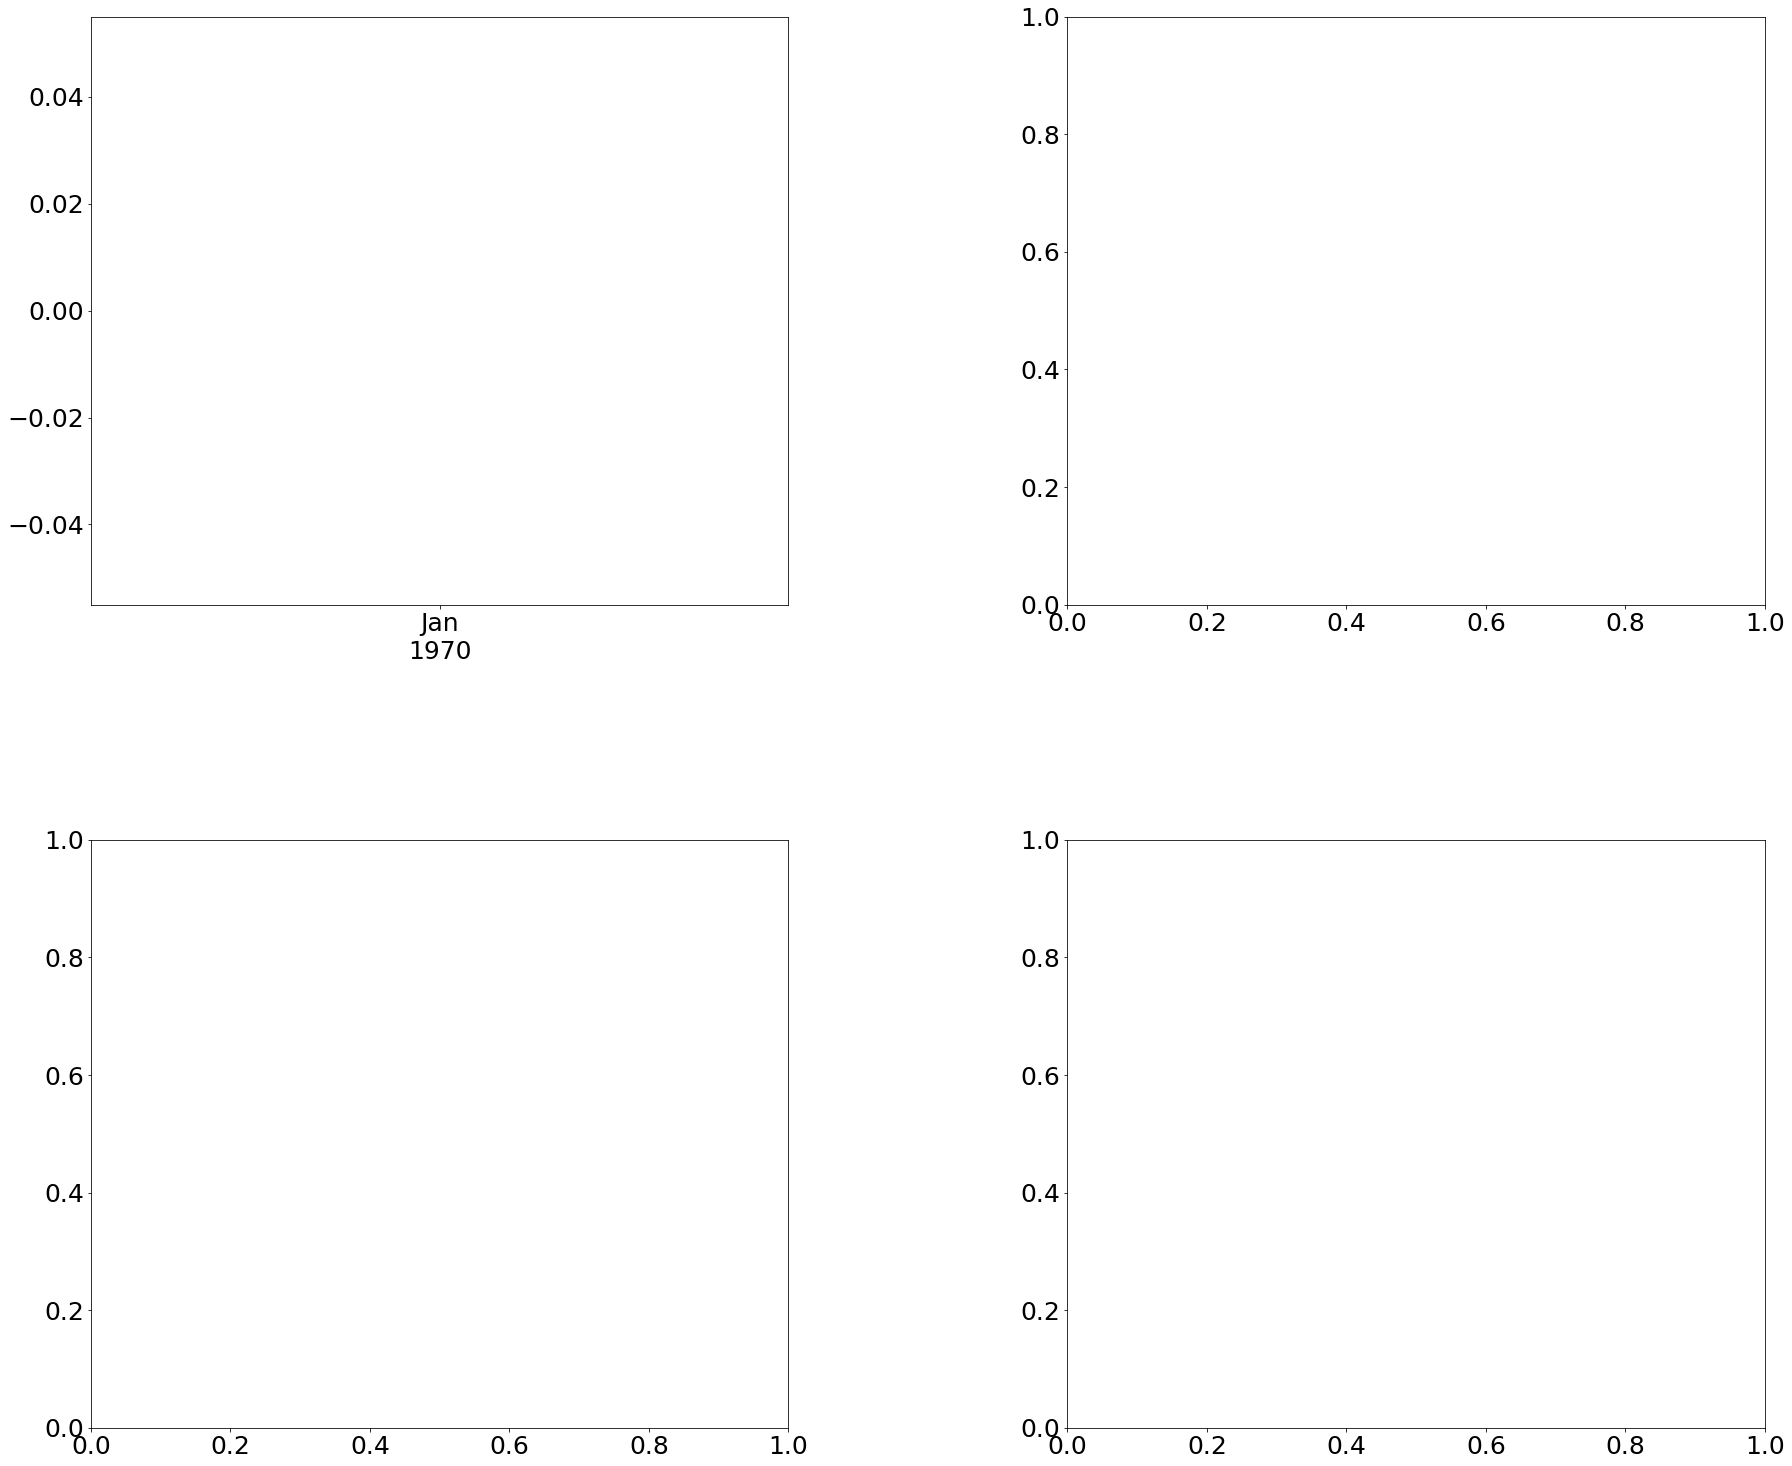

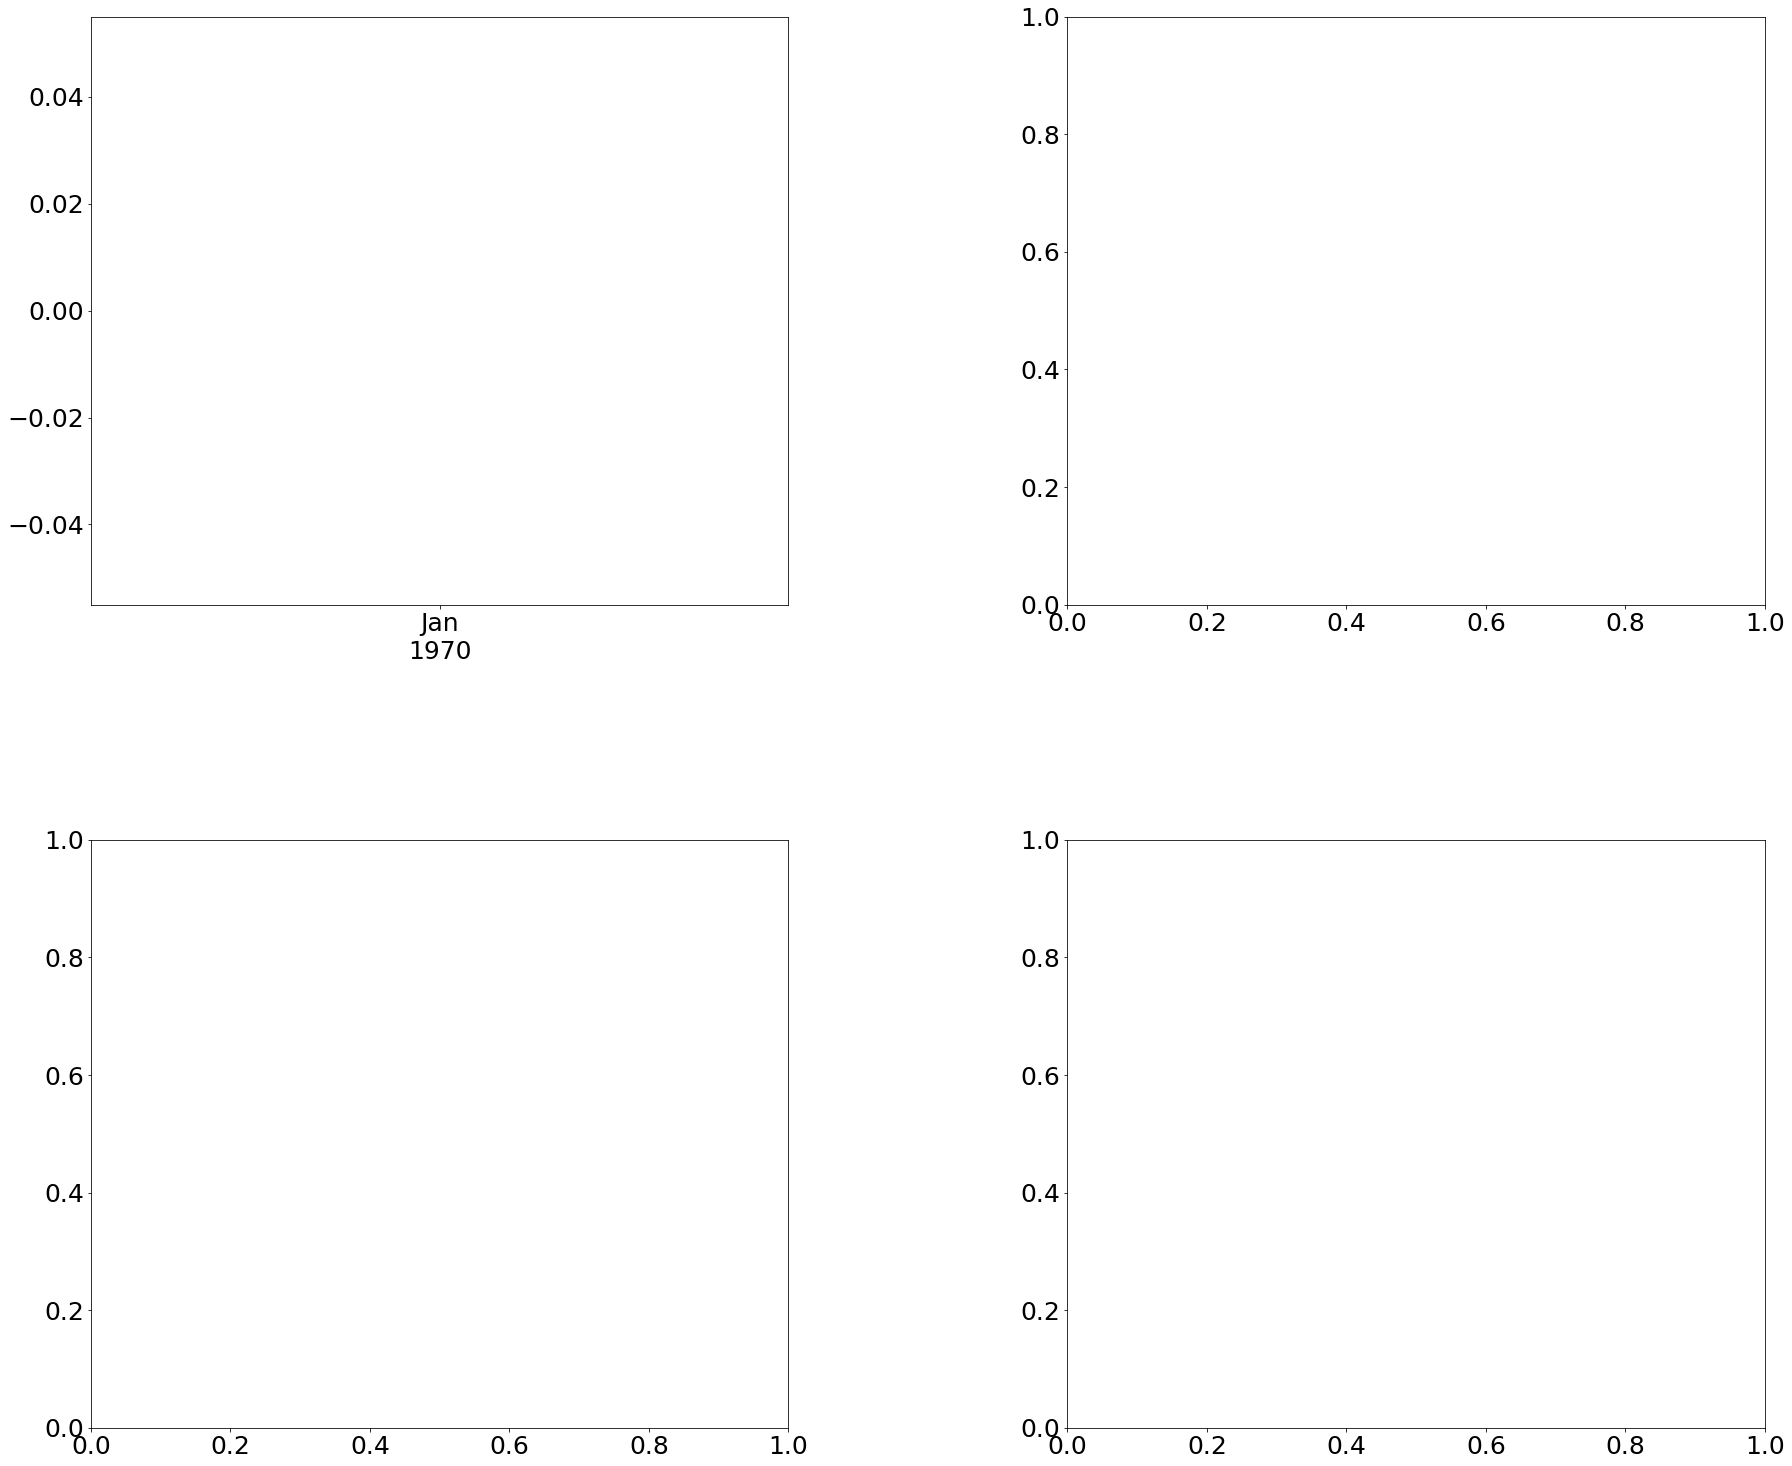

In [76]:

#  NUmber of Assignments is less then Quizzes
@interact(st = stID, cs = course)
def plot_data( st, cs):
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs)

In [ ]:
import plotly.graph_objs as go
@interact(sbj=df_avt.Course_code.unique())
def plot_subject(sbj):
  plt.rcParams.update({'font.size': 25})
  x = np.arange(10)
  layout = go.Layout(
    autosize=False,
    width= 1200 , height= 600 )
  fig=go.Figure(layout=layout)

  fig.add_trace(go.Scatter(      
      x=df_avt[(df_avt.Course_code==sbj)&(df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(df_avt.Activity_type=="0")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers', name="Quiz"))

  fig.add_trace(go.Scatter(
      x=df_avt[(df_avt.Course_code==sbj)&(df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_submit_Time"].sort_index(), 
      y=df_avt[(df_avt.Course_code==sbj)&(df_avt.Activity_type=="1")].loc["2020-09":"2021-09", "Act_mark"].sort_index()
      , mode='lines+markers' , name="Assignment"))



  
  fig.update_layout(hovermode="x" , 
      # title="أداء جميع الطلبة في مادة معينة",
    xaxis_title="Submit Time",
    yaxis_title="Mark",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="#7f7f7f")
     title={
        'text': "أداء جميع الطلبة في مادة معينة",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}) 
  fig.show()


interactive(children=(Dropdown(description='sbj', options=('g1_2', 'g1_6', 'g1_3', 'g1_4', 'g1_1', 'g7_2', 'g7…

##  Data Preparation

In [ ]:
pd.pivot_table(df_avt, index=["Course_code", "Activity_type"],values="Activity_id" , 
               aggfunc="count")

Activity_id
Course_code Activity_type             
g1_1        0                       99
            1                       89
g1_2        0                       90
            1                      107
g1_3        0                       95
...                                ...
g9_4        1                       65
g9_5        0                       71
            1                       69
g9_6        0                       74
            1                       94

[108 rows x 1 columns]

In [ ]:
df_avt.drop([  "Unit_id", "Chapter_id", "Lesson_id"], inplace=True, axis=1)

In [ ]:
df_avt.set_index("Act_submit_Time", inplace=True, drop=True)

In [ ]:
df_avt.index=pd.to_datetime(df_avt.index)

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-10-11 00:08:27,140766636,g1_2,g1_2-Act_19,0,1,2,185,2.57
2020-08-16 20:04:04,140766636,g1_6,g1_6-Act_7,0,4,1,97,5.17
2020-02-23 03:34:16,140766636,g1_3,g1_3-Act_8,1,1,1,409,4.80
2020-12-18 21:08:49,140766636,g1_2,g1_2-Act_9,0,2,1,431,7.45
2020-06-28 13:10:44,140766636,g1_4,g1_4-Act_11,1,1,2,670,8.61


In [ ]:
#  4  dashboard
#plt.rcParams.update({'font.size': 12})
#df_avt[["Act_mark"]].groupby(pd.Grouper(freq="W")).agg("mean").plot()

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-10-11 00:08:27,140766636,g1_2,g1_2-Act_19,0,1,2,185,2.57
2020-08-16 20:04:04,140766636,g1_6,g1_6-Act_7,0,4,1,97,5.17
2020-02-23 03:34:16,140766636,g1_3,g1_3-Act_8,1,1,1,409,4.80
2020-12-18 21:08:49,140766636,g1_2,g1_2-Act_9,0,2,1,431,7.45
2020-06-28 13:10:44,140766636,g1_4,g1_4-Act_11,1,1,2,670,8.61


In [ ]:
df_act_Stat=pd.pivot_table(df_avt, index=["Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" , "Activity_id"]   , aggfunc={
                   "Act_mark":("mean","max", "count", "min"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", "min"),
                   "Activity_id": lambda x: x.nunique()
               }).rename(columns={
                   "Activity_id" :  "Activities_Count"  #  number of activities
#                 "Act_mark":"Std_act_m", 
#                    "Act_diff": "Std_act_d",
#                    "Act_cp_count": "Std_act_cp",
#                    "Act_time": "Std_act_t"  

               })


In [ ]:
df_act_Stat.sample(100)

Act_cp_count  Act_diff  ... Act_time Activities_Count
                                  mean      mean  ...      min         <lambda>
Course_code Activity_type                         ...                          
g7_2        0                 1.455696  2.645570  ...     54.0               19
g8_3        1                 1.528846  2.586538  ...     51.0               20
g6_3        0                 1.545455  2.333333  ...     34.0               19
g4_1        1                 1.593750  2.578125  ...     40.0               20
g1_3        1                 1.554348  2.532609  ...     39.0               20
...                                ...       ...  ...      ...              ...
g3_1        0                 1.583333  2.708333  ...     45.0               19
g1_3        0                 1.431579  2.336842  ...     32.0               20
g5_4        1                 1.446429  2.553571  ...     34.0               20
g1_5        1                 1.466019  2.475728  ...     31.0               20
g6_3        1                 1.407407  2.296296  ...     53.0               18

[100 rows x 10 columns]

In [ ]:
df_act_Stat.columns=[f"{i}_{j}" for  i , j in df_act_Stat.columns]

In [ ]:
df_avt[(df_avt.Course_code=="g5_6")&(df_avt.Activity_type=="0")].describe()

,Act_diff,Act_cp_count,Act_time,Act_mark
count,75.000000,75.000000,75.000000,75.000000
mean,2.293333,1.506667,455.973333,5.055867
std,1.049753,0.503322,269.605015,2.792119
min,1.000000,1.000000,48.000000,0.020000
25%,1.000000,1.000000,229.500000,2.845000
50%,2.000000,2.000000,419.000000,5.020000
75%,3.000000,2.000000,719.500000,7.280000
max,4.000000,2.000000,897.000000,9.910000


## Students' Achievement Statistics  **

In [ ]:
df_std_Stat=pd.pivot_table(df_avt, index=["student_ID","Course_code","Activity_type" ], 
               values=["Act_mark", "Act_diff", "Act_cp_count", "Act_time" ]   , aggfunc={
                   "Act_mark":("mean","max", "count", np.std, "last"), 
                   "Act_diff": "mean",
                   "Act_cp_count": "mean",
                   "Act_time": ("mean", "max", np.std)
               },  fill_value=0 ).rename(columns={
                "Act_mark":"Std_act_m", 
                   "Act_diff": "Std_act_d",
                   "Act_cp_count": "Std_act_cp",
                   "Act_time": "Std_act_t"   

               })
df_std_Stat.head()

Std_act_cp Std_act_d  ... Std_act_t            
                                           mean      mean  ...      mean         std
student_ID Course_code Activity_type                       ...                      
060153728  g9_1        0                    1.0       2.5  ...     556.5  412.243253
                       1                    1.0       3.0  ...     758.0    0.000000
           g9_2        0                    2.0       1.0  ...     686.0    0.000000
                       1                    1.0       4.0  ...     811.0    0.000000
           g9_4        1                    1.0       1.0  ...     264.0    0.000000

[5 rows x 10 columns]

In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-07-25 17:39:10,060314154,g9_3,g9_3-Act_1,1,3,2,753,4.14


In [ ]:
df_avt[(df_avt.student_ID=="060314154")& (df_avt.Course_code=="g9_3")]

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-07-25 17:39:10,060314154,g9_3,g9_3-Act_1,1,3,2,753,4.14
2020-05-19 17:28:39,060314154,g9_3,g9_3-Act_14,1,3,2,626,4.37
2020-04-14 20:29:08,060314154,g9_3,g9_3-Act_14,1,4,1,258,6.41


In [ ]:
df_std_Stat.columns=[f"{i}_{j}" for  i , j in df_std_Stat.columns]

In [ ]:
df_std_Stat.sample(5)

,,,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std
student_ID,Course_code,Activity_type,,,,,,,,,,
140898302,g1_5,0,1.666667,2.666667,3,1.71,7.77,3.756667,3.475879,811,658.333333,197.710226
060742252,g9_2,0,2.000000,3.000000,2,5.59,8.72,7.155000,2.213244,462,293.000000,239.002092
130243142,g2_4,0,2.000000,1.000000,1,4.56,4.56,4.560000,0.000000,378,378.000000,0.000000
060521660,g9_2,0,1.000000,3.000000,1,5.19,5.19,5.190000,0.000000,38,38.000000,0.000000
090801533,g6_1,0,2.000000,3.000000,1,6.80,6.80,6.800000,0.000000,778,778.000000,0.000000


- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_std_Stat["Act_score"]=np.log1p( 
    df_std_Stat.Std_act_t_max/df_std_Stat.Std_act_t_mean +df_std_Stat.Std_act_d_mean* df_std_Stat.Std_act_cp_mean
)*df_std_Stat["Std_act_m_max"]**2/df_std_Stat.Std_act_m_mean

In [ ]:
df_std_Stat.head()

Std_act_cp_mean  ...  Act_score
student_ID Course_code Activity_type                   ...           
060153728  g9_1        0                          1.0  ...  10.694730
                       1                          1.0  ...   6.872300
           g9_2        0                          2.0  ...   7.777111
                       1                          1.0  ...   5.608207
           g9_4        1                          1.0  ...   1.757780

[5 rows x 11 columns]

In [ ]:
df_std_Stat.reset_index(inplace=True)

In [ ]:
df_std_Stat.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score
0,060153728,g9_1,0,1.0,2.5,2,5.77,5.77,5.025,1.053589,848,556.5,412.243253,10.694730
1,060153728,g9_1,1,1.0,3.0,1,4.27,4.27,4.270,0.000000,758,758.0,0.000000,6.872300
2,060153728,g9_2,0,2.0,1.0,1,5.61,5.61,5.610,0.000000,686,686.0,0.000000,7.777111
3,060153728,g9_2,1,1.0,4.0,1,3.13,3.13,3.130,0.000000,811,811.0,0.000000,5.608207
4,060153728,g9_4,1,1.0,1.0,1,1.60,1.60,1.600,0.000000,264,264.0,0.000000,1.757780


In [ ]:
df_act_Stat.sample()

,,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
Course_code,Activity_type,,,,,,,,,,
g1_6,0,1.410526,2.389474,95,9.95,4.706,0.14,886.0,503.526316,36.0,20


In [ ]:
df_act_Stat.reset_index(inplace=True)

In [ ]:
df_mg=df_std_Stat.merge(df_act_Stat,  on=["Course_code", "Activity_type"])

In [ ]:
df_mg.head()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_last,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
0,060153728,g9_1,0,1.0,2.5,2,5.77,5.77,5.025000,1.053589,848,556.500000,412.243253,10.694730,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20
1,060154824,g9_1,0,2.0,2.0,3,9.28,9.28,6.743333,2.289549,832,596.333333,243.331735,23.696990,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20
2,060179000,g9_1,0,1.0,4.0,1,6.74,6.74,6.740000,0.000000,684,684.000000,0.000000,12.076459,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20
3,060215341,g9_1,0,2.0,2.0,1,3.33,3.33,3.330000,0.000000,750,750.000000,0.000000,5.966559,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20
4,060218548,g9_1,0,1.5,1.5,2,6.05,7.03,6.540000,0.692965,347,283.000000,90.509668,11.325721,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20


In [ ]:
df_mg["last_mark"]=df_mg.Std_act_m_last  # put the target at the end of table
df_mg.drop("Std_act_m_last", axis=1, inplace=True)  #  drop the last mark feature.

In [ ]:
df_mg.sample(3)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
473,061212713,g9_3,0,2.0,3.0,1,8.81,8.81,0.000000,336,336.0,0.000000,18.319880,1.473684,2.407895,76,9.94,4.842500,0.10,881.0,389.934211,33.0,19,8.81
878,070241977,g8_6,0,2.0,3.0,1,5.71,5.71,0.000000,578,578.0,0.000000,11.873611,1.427184,2.456311,103,9.92,4.796505,0.18,899.0,427.592233,40.0,19,5.71
724,071106500,g8_3,1,1.5,3.0,2,5.58,5.04,0.763675,387,263.0,175.362482,11.996336,1.528846,2.586538,104,9.97,4.889327,0.01,886.0,460.288462,51.0,20,4.50


In [ ]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4407 entries, 0 to 4406
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_ID                 4407 non-null   object 
 1   Course_code                4407 non-null   object 
 2   Activity_type              4407 non-null   object 
 3   Std_act_cp_mean            4407 non-null   float64
 4   Std_act_d_mean             4407 non-null   float64
 5   Std_act_m_count            4407 non-null   int64  
 6   Std_act_m_max              4407 non-null   float64
 7   Std_act_m_mean             4407 non-null   float64
 8   Std_act_m_std              4407 non-null   float64
 9   Std_act_t_max              4407 non-null   int64  
 10  Std_act_t_mean             4407 non-null   float64
 11  Std_act_t_std              4407 non-null   float64
 12  Act_score                  4404 non-null   float64
 13  Act_cp_count_mean          4407 non-null   float

In [ ]:
df_mg.to_csv("./Data/MarkPrediction.csv")

## Student Achievement Graph

In [ ]:
df_mg.sample()

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
1745,090188419,g6_4,1,1.0,2.0,1,0.93,0.93,0.0,631,631.0,0.0,1.289254,1.45,2.6,60,9.97,5.009,0.34,898.0,456.383333,32.0,19,0.93


In [ ]:
pd.pivot_table(df_avt, index=["student_ID"], values=["Activity_id"], aggfunc=["count"]).sample()

,count
,Activity_id
student_ID,
090971646,10


In [ ]:
df_ActAv=pd.pivot_table(df_avt, index=["Course_code", "Activity_type", "Activity_id"], 
               values=["Act_diff", 	"Act_cp_count", 	"Act_time" , 	"Act_mark"] , aggfunc=("mean")).rename(
   columns={
    "Act_diff": "Act_diff_avg", 	
    "Act_cp_count": "Act_cp_avg", 	
    "Act_time" : "Act_time_avg" , 	
    "Act_mark" : "Act_mark_avg" 
   } 
)

In [ ]:
df_ActAv.head()

Act_cp_avg  ...  Act_time_avg
Course_code Activity_type Activity_id              ...              
g1_1        0             g1_1-Act_1     1.272727  ...    558.363636
                          g1_1-Act_10    1.666667  ...    280.666667
                          g1_1-Act_11    1.250000  ...    451.500000
                          g1_1-Act_12    1.500000  ...    463.000000
                          g1_1-Act_13    1.333333  ...    164.333333

[5 rows x 4 columns]

In [ ]:
df_ActAv.shape

(2101, 4)

In [ ]:
df_avt.loc["2020-09"].head()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-09-19 11:38:15,081250796,g7_6,g7_6-Act_15,1,1,1,496,2.35
2020-09-03 04:44:14,130447832,g2_5,g2_5-Act_11,0,1,2,140,0.47
2020-09-19 04:31:45,110966152,g4_2,g4_2-Act_7,0,1,1,428,1.92
2020-09-02 15:21:55,110966152,g4_5,g4_5-Act_7,0,3,1,413,9.73
2020-09-10 04:36:15,110966152,g4_4,g4_4-Act_18,1,3,1,758,2.06


In [ ]:
df_plt=  df_avt[df_avt.student_ID=="081250796"].loc["2020-4":"2021-2" ,["Course_code", "Activity_type" , "Activity_id", "Act_diff", 	"Act_cp_count", 	"Act_time"	,"Act_mark"]]

In [ ]:
df_plt.groupby("Course_code").Activity_id.agg("count")

Course_code
g7_1    7
g7_2    4
g7_3    1
g7_4    2
g7_5    6
g7_6    2
Name: Activity_id, dtype: int64

In [ ]:
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,
2020-04-14 02:20:22,g7_2,0,g7_2-Act_9,3,2,693,7.69
2020-10-15 10:45:25,g7_1,0,g7_1-Act_2,4,1,380,4.78
2020-05-20 11:05:31,g7_1,1,g7_1-Act_15,4,1,879,7.67
2020-04-04 06:45:47,g7_5,1,g7_5-Act_7,2,2,750,4.11
2020-11-07 10:02:30,g7_2,0,g7_2-Act_3,1,1,759,4.67


In [ ]:
df_plt.reset_index(inplace=True)

In [ ]:
df_plt=df_plt.merge( df_ActAv, on=["Activity_type", "Activity_id" ])

In [ ]:
df_plt.keys()

Index(['Act_submit_Time', 'Course_code', 'Activity_type', 'Activity_id',
       'Act_diff', 'Act_cp_count', 'Act_time', 'Act_mark', 'Act_cp_avg',
       'Act_diff_avg', 'Act_mark_avg', 'Act_time_avg'],
      dtype='object')

In [ ]:
df_plt.set_index("Act_submit_Time", inplace=True)

In [ ]:
# this is dataset for a particular Student.
df_plt.head()

,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
Act_submit_Time,,,,,,,,,,,
2020-04-14 02:20:22,g7_2,0,g7_2-Act_9,3,2,693,7.69,1.333333,2.333333,6.22000,518.333333
2020-08-11 18:03:16,g7_2,0,g7_2-Act_9,3,1,571,4.79,1.333333,2.333333,6.22000,518.333333
2020-10-15 10:45:25,g7_1,0,g7_1-Act_2,4,1,380,4.78,1.250000,2.375000,5.00125,410.625000
2020-05-20 11:05:31,g7_1,1,g7_1-Act_15,4,1,879,7.67,1.500000,3.500000,6.57500,667.000000
2020-04-04 06:45:47,g7_5,1,g7_5-Act_7,2,2,750,4.11,1.750000,1.500000,3.10500,503.750000


In [ ]:
df_plt["Activity_type"]=df_plt.Activity_type.astype(int)  

In [ ]:
df_plt[df_plt.Activity_type==1]["Act_mark"]

Act_submit_Time
2020-05-20 11:05:31    7.67
2020-04-04 06:45:47    4.11
2020-09-19 11:38:15    2.35
2020-11-17 07:44:30    2.76
2020-05-05 22:08:40    3.13
2020-05-23 03:45:03    6.32
2020-04-12 22:51:27    6.21
2020-08-31 06:25:37    3.26
2020-06-29 09:54:05    1.40
Name: Act_mark, dtype: float64

In [ ]:
df_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-04-14 02:20:22 to 2020-10-01 07:00:24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Course_code    22 non-null     object 
 1   Activity_type  22 non-null     int64  
 2   Activity_id    22 non-null     object 
 3   Act_diff       22 non-null     int64  
 4   Act_cp_count   22 non-null     int64  
 5   Act_time       22 non-null     int64  
 6   Act_mark       22 non-null     float64
 7   Act_cp_avg     22 non-null     float64
 8   Act_diff_avg   22 non-null     float64
 9   Act_mark_avg   22 non-null     float64
 10  Act_time_avg   22 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 2.1+ KB


In [ ]:

df_plt[df_plt.Activity_type==0]["Act_mark"]

Act_submit_Time
2020-04-14 02:20:22    7.69
2020-08-11 18:03:16    4.79
2020-10-15 10:45:25    4.78
2020-11-07 10:02:30    4.67
2020-08-19 04:53:26    6.13
2020-12-11 02:18:41    5.29
2020-08-28 23:08:38    0.24
2020-10-07 13:13:51    4.76
2020-07-10 10:40:51    4.68
2020-04-12 05:04:37    4.62
2020-08-08 15:12:55    2.09
2020-10-12 10:50:54    3.89
2020-10-01 07:00:24    9.19
Name: Act_mark, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

[Text(0.5, 0, 'Dates'),
 Text(0.5, 1.0, 'Assign. Mark VS Assign. Avg Mark Timeline')]

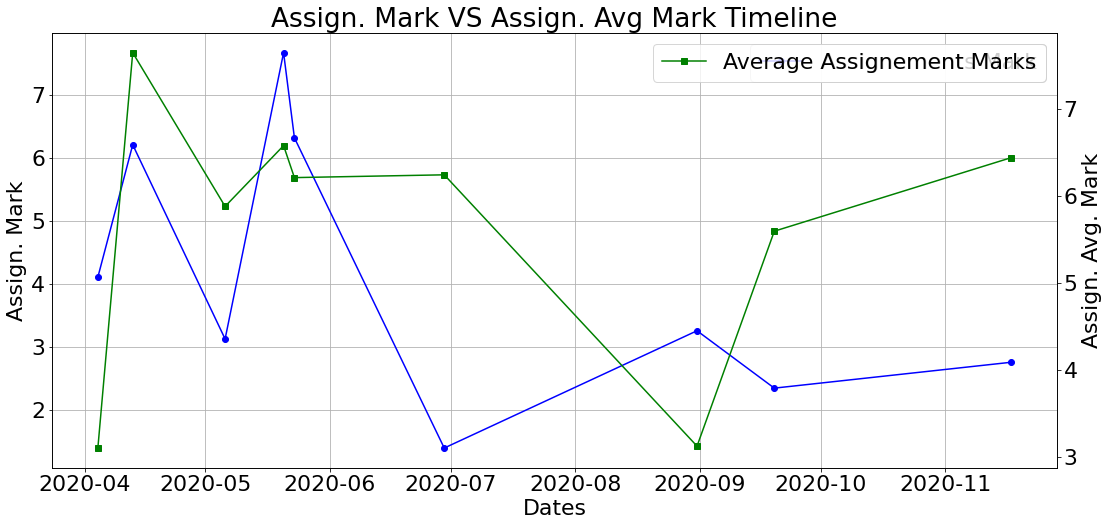

In [ ]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

ax1.plot( df_plt[df_plt.Activity_type==1]["Act_mark"].sort_index(), marker="o" , color="blue", label="Assignements Mark")
ax2=ax1.twinx()
ax2.plot( df_plt[df_plt.Activity_type==1]["Act_mark_avg"].sort_index(), marker="s" , color="green", label="Average Assignement Marks" )

#plt.legend()
ax1.legend()
ax2.legend()
ax1.grid()
ax2.set_ylabel("Assign. Avg. Mark")
ax1.set_ylabel("Assign. Mark")




ax1.set(xlabel="Dates",
        #ylabel="Quizzes Marks",
        title="Assign. Mark VS Assign. Avg Mark Timeline")

In [ ]:
df_plt.reset_index(inplace=True)
df_plt.head()

,Act_submit_Time,Course_code,Activity_type,Activity_id,Act_diff,Act_cp_count,Act_time,Act_mark,Act_cp_avg,Act_diff_avg,Act_mark_avg,Act_time_avg
0,2020-04-14 02:20:22,g7_2,0,g7_2-Act_9,3,2,693,7.69,1.333333,2.333333,6.22000,518.333333
1,2020-08-11 18:03:16,g7_2,0,g7_2-Act_9,3,1,571,4.79,1.333333,2.333333,6.22000,518.333333
2,2020-10-15 10:45:25,g7_1,0,g7_1-Act_2,4,1,380,4.78,1.250000,2.375000,5.00125,410.625000
3,2020-05-20 11:05:31,g7_1,1,g7_1-Act_15,4,1,879,7.67,1.500000,3.500000,6.57500,667.000000
4,2020-04-04 06:45:47,g7_5,1,g7_5-Act_7,2,2,750,4.11,1.750000,1.500000,3.10500,503.750000


## Pipeline    SGBRegressor  Mark Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
df_mg.head(10)

,student_ID,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
0,060153728,g9_1,0,1.000000,2.5,2,5.77,5.025000,1.053589,848,556.500000,412.243253,10.694730,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,5.77
1,060154824,g9_1,0,2.000000,2.0,3,9.28,6.743333,2.289549,832,596.333333,243.331735,23.696990,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,9.28
2,060179000,g9_1,0,1.000000,4.0,1,6.74,6.740000,0.000000,684,684.000000,0.000000,12.076459,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.74
3,060215341,g9_1,0,2.000000,2.0,1,3.33,3.330000,0.000000,750,750.000000,0.000000,5.966559,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,3.33
4,060218548,g9_1,0,1.500000,1.5,2,7.03,6.540000,0.692965,347,283.000000,90.509668,11.325721,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.05
5,060251919,g9_1,0,2.000000,1.0,1,4.26,4.260000,0.000000,872,872.000000,0.000000,5.905614,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,4.26
6,060253719,g9_1,0,1.000000,2.5,2,6.74,3.625000,4.405275,338,287.000000,72.124892,19.334069,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.74
7,060276779,g9_1,0,1.000000,4.0,1,4.90,4.900000,0.000000,751,751.000000,0.000000,8.779621,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,4.90
8,060290531,g9_1,0,1.000000,4.0,1,6.97,6.970000,0.000000,182,182.000000,0.000000,12.488564,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.97
9,060294694,g9_1,0,1.333333,2.0,3,8.82,4.150000,4.131670,846,555.666667,300.466859,30.865255,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,8.82


In [ ]:
# df_mg.drop("student_ID", axis=1, inplace= True)  # Drop Student_ID
df_mg.set_index("student_ID", inplace=True)

In [ ]:
std_array

array(['140766636', '081250796', '140888083', '130447832', '110966152',
       '070157735', '100629845', '140420262', '130948444', '110792888'],
      dtype=object)

In [ ]:
# Split Data

X_train=df_mg.drop(std_array, axis = 0).iloc[:,:-1]
y=df_mg.drop(std_array, axis = 0).iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     #OneHotEncoder(  sparse=False ,handle_unknown = 'ignore'),
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(4315, 75)

In [ ]:
preprocess.fit_transform(X_train)[0]

array([-1.20300106,  0.00563403,  0.10703596, -0.12221876,  0.0376474 ,
       -0.19462696,  1.17205294,  0.43496611,  2.05192632, -0.39550539,
       -2.00118415, -0.38812162, -0.00719158, -2.2590313 , -0.53732362,
        0.97026088, -1.48837152,  0.46059906,  2.17697444,  0.67355487,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.  

In [ ]:
# pipelline Model
from xgboost import XGBRegressor
pipe_reg= make_pipeline(
    preprocess, 
    XGBRegressor(objective="reg:squarederror")
    )

In [ ]:
pipe_reg.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5778fcf050>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5778fcf090>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransformer__pipeline-1__memory': None,
 'columntransformer__pipeline-1__standardscaler': StandardScaler(),
 'columntransformer__pip

In [ ]:
# hyper parameters

param_grid={
    "xgbregressor__learning_rate": [0.01, 0.1],
    "xgbregressor__max_depth" : [3,5,7, 10] ,
    "xgbregressor__min_child_weight" :[1,3,5],
    "xgbregressor__subsample": [0.5, 0.7],
    "xgbregressor__colsample_bytree": [0.5, 0.7],
    "xgbregressor__n_estimators": [200, 400, 1000]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="neg_mean_squared_error", cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=3, xgbregressor__min_child_weight=3, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7;, score=-2.402 total time=   2.8s
[CV 2/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=3, xgbregressor__min_child_weight=3, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7;, score=-2.514 total time=   2.6s
[CV 3/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=3, xgbregressor__min_child_weight=3, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7;, score=-3.097 total time=   2.6s
[CV 4/5] END xgbregressor__colsample_bytree=0.7, xgbregressor__learning_rate=0.01, xgbregressor__max_depth=3, xgbregressor__min_child_weight=3, xgbregressor__n_estimators=400, xgbregressor__subsample=0.7;, score=-2.948 total 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f5778fcf050>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                One...
                                              XGBRegressor(ob

In [ ]:
gs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f576fa83850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f576fa838d0>)])),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.7, learning_rate=0.01,

In [ ]:
gs.best_params_

{'xgbregressor__colsample_bytree': 0.7,
 'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 3,
 'xgbregressor__min_child_weight': 3,
 'xgbregressor__n_estimators': 400,
 'xgbregressor__subsample': 0.7}

In [ ]:
#X_test.sample()

In [ ]:
#df_mg.head()

In [ ]:
y_pred=gs.predict(X_train)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y, y_pred):.3f}")

  MAE : 1.020
  MSE : 2.422
  RMSE : 1.556
  R^2 : 0.709
  Explained Variance Score : 1.020


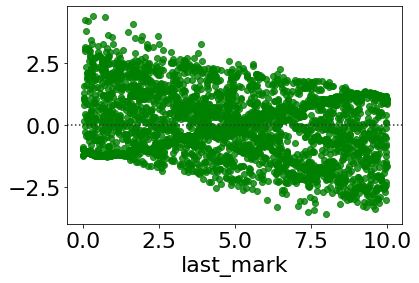

In [ ]:
# Residual Plot
import seaborn as sns
_= sns.residplot(x=y, y=y_pred, color="green")

In [ ]:
predict_std = df_mg.loc[std_array, :]

In [ ]:
std_array

array(['140766636', '081250796', '140888083', '130447832', '110966152',
       '070157735', '100629845', '140420262', '130948444', '110792888'],
      dtype=object)

In [ ]:
X_train.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_count_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>'],
      dtype='object')

In [ ]:
predict_std.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_count_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>', 'last_mark'],
      dtype='object')

In [ ]:
predict_std.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
140766636,g1_1,0,1.000000,2.000000,1,0.16,0.16,0.000000,478,478.0,0.000000,0.221807,1.464646,2.545455,99,9.95,5.369495,0.16,882.0,464.595960,33.0,20,0.16
140766636,g1_1,1,1.000000,1.000000,1,2.46,2.46,0.000000,720,720.0,0.000000,2.702586,1.494382,2.685393,89,9.92,5.356629,0.11,885.0,484.393258,36.0,20,2.46
140766636,g1_2,0,1.333333,1.666667,3,7.45,5.05,2.440983,683,433.0,249.006024,17.239081,1.466667,2.244444,90,9.87,4.354889,0.00,897.0,499.733333,31.0,19,5.13
140766636,g1_2,1,2.000000,3.000000,1,9.45,9.45,0.000000,378,378.0,0.000000,19.650723,1.411215,2.485981,107,9.88,4.570561,0.27,890.0,452.420561,30.0,20,9.45
140766636,g1_3,0,2.000000,2.000000,1,9.98,9.98,0.000000,636,636.0,0.000000,17.881760,1.431579,2.336842,95,9.99,5.637789,0.02,885.0,446.463158,32.0,20,9.98


In [ ]:
gs.predict(predict_std.drop("last_mark" , axis=1))

array([0.5633229, 2.210587 , 4.740876 , 9.152716 , 9.301125 , 2.6497936,
       4.594038 , 8.460373 , 3.939941 , 5.6510315, 5.029778 , 2.1632538,
       4.5088534, 3.7287793, 7.563755 , 2.1700678, 4.548464 , 5.5147033,
       2.601584 , 8.535798 , 8.826474 , 5.6371713, 1.8692853, 7.56335  ,
       4.7853503, 5.4618754, 4.248077 , 6.1524687, 1.2946866, 4.40355  ,
       3.8538852, 4.0925703, 0.6295456, 3.268438 , 2.5900173, 4.177847 ,
       3.3169637, 3.6436322, 7.716044 , 1.7949387, 7.5488324, 6.765401 ,
       5.6163483, 5.9514484, 5.5340247, 4.111431 , 8.321152 , 3.2960148,
       4.532616 , 2.372372 , 4.562409 , 5.4766717, 7.101959 , 4.2876883,
       5.7034535, 0.6797738, 7.953515 , 3.8723614, 9.160393 , 4.6081347,
       3.9865565, 3.082241 , 5.815329 , 6.5167313, 3.1772633, 9.075536 ,
       4.9576063, 1.9511974, 2.4660668, 4.373091 , 4.754198 , 8.297379 ,
       7.9172807, 5.105729 , 8.85015  , 6.7869616, 4.49123  , 0.9899034,
       2.3530104, 6.609631 , 4.7330036, 8.624343 , 

In [ ]:
predict_std["last_mark"]=gs.predict(predict_std.drop("last_mark" , axis=1))

In [ ]:
predict_std.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
140766636,g1_1,0,1.000000,2.000000,1,0.16,0.16,0.000000,478,478.0,0.000000,0.221807,1.464646,2.545455,99,9.95,5.369495,0.16,882.0,464.595960,33.0,20,0.563323
140766636,g1_1,1,1.000000,1.000000,1,2.46,2.46,0.000000,720,720.0,0.000000,2.702586,1.494382,2.685393,89,9.92,5.356629,0.11,885.0,484.393258,36.0,20,2.210587
140766636,g1_2,0,1.333333,1.666667,3,7.45,5.05,2.440983,683,433.0,249.006024,17.239081,1.466667,2.244444,90,9.87,4.354889,0.00,897.0,499.733333,31.0,19,4.740876
140766636,g1_2,1,2.000000,3.000000,1,9.45,9.45,0.000000,378,378.0,0.000000,19.650723,1.411215,2.485981,107,9.88,4.570561,0.27,890.0,452.420561,30.0,20,9.152716
140766636,g1_3,0,2.000000,2.000000,1,9.98,9.98,0.000000,636,636.0,0.000000,17.881760,1.431579,2.336842,95,9.99,5.637789,0.02,885.0,446.463158,32.0,20,9.301125


In [ ]:
predict_std.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_count_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>', 'last_mark'],
      dtype='object')

In [ ]:
predict_std["last_mark"]= gs.predict(predict_std.drop("last_mark" , axis=1))

In [ ]:
predict_std.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
140888083,g1_4,0,2.0,3.0,2,7.19,5.965,1.732412,671,394.0,391.737157,18.751627,1.418605,2.604651,86,9.87,4.34186,0.08,886.0,498.581395,42.0,20,5.637171


In [ ]:
#  NUmber of Assignments is less then Quizzes
@interact(st = stID, cs = course)
def plot_data( st, cs):
  print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  
  plot_std_Data(st, cs)

interactive(children=(Dropdown(description='st', options=('140766636', '081250796', '140888083', '130447832', …

In [ ]:
def plot_std_Data(st, cs):
  course.options = std_d[st]
  plt.rcParams.update({'font.size': 25})
  dtset=  df_avt[df_avt.Course_code==cs]


  fig, ax=plt.subplots(2, 2, figsize=(30,20) )
  plt.subplots_adjust(top = 0.99, bottom=0.01,wspace=0.4, hspace= 0.4)

  point = pd.DataFrame({'x': df_avt.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'")["Act_submit_Time"].max()+ datetime.timedelta(days=7),
                        'y': predict_std.reset_index().query(f"Course_code=='{cs_var}' & student_ID=='{ss}' & Activity_type=='0'")["last_mark"]})


  dtset[dtset.Activity_type=="1"].Act_mark.resample("M").mean().plot( subplots=True,marker="o",    ax=ax[0, 0] , color="brown") #label="Assignement trend/Month")
  # df_avt[df_avt.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,0] , color="green", label="Average Quizz Marks" )

  dtset[dtset.Activity_type=="0"].Act_mark.resample("M").mean().plot( subplots=True, marker="s",   ax=ax[0,1] , color="brown")# label="Quizz Marks trend/Month" )
  # df_plt[df_plt.Activity_type==0]["Act_mark_avg"].plot( subplots=True, marker="s",   ax=ax[0,1] , color="green", label="Average Quizz Marks" )
  point.plot(datetime.datetime.now(), 5,ax=ax[0,1] , color= "b" )
  # add time Avg per Activity

  ax4=ax[1,1].twinx()
  dtset[dtset.Activity_type=="1"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax4 , color="green")# label="Quizz Avg Time" )

  # df_plt[df_plt.Activity_type==0]["Act_time_avg"].plot( subplots=True, marker="+",   ax=ax[1,1] , color="brown", label="Average time" )


  ax3=ax[1,0].twinx()
  dtset[dtset.Activity_type=="0"].Act_time.resample("M").mean().plot( subplots=True, marker="s",   ax=ax3 , color="green")# label="Assignment Avg Time" )
  # df_plt[df_plt.Activity_type==1]["Act_time_avg"].plot( subplots=True,marker="o",    ax=ax[1, 0] , color="blue", label="Assignement Submission Avg time")

  # plt.legend()
  
  
  # ---------------------------------------------------------------------
  # Set title and labels for axes
  ax[0,0].set(xlabel="Dates",
        ylabel="Assignments Mark",
        title=" Assignement Mark Trend / Month Timeline")
  fig.autofmt_xdate(rotation=45)

  #plt.grid()
  ax[0,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  
# ----------------------------------------------------------------------
  ax[0,1].set(xlabel="Dates",
        ylabel="Quizzes Marks",
        title=" Quizzes Marks Trend / Month Timeline")
  ax4.set(
        ylabel="Quizz Mark"
        )
  ax4.grid()
  ax4.legend()
  
  # ---------------------------------------------------------------------
  ax[1,1].set(ylabel="Quizzes Submission time ",
        title= "Quizzes Time Submission Trend / Month")
  

  # ----------------------------------------------------------------
  ax[1,0].set(xlabel="Dates",
        ylabel="Assignments Subission Time",
        title="Assignments Time Submission Trend / Month")

  fig.autofmt_xdate(rotation=45)
#-----------------------------------------------------------------------
   #fig.update_layout(hovermode="x" , 
  #        title={
  #       'text': "أداء جميع الطلبة في مادة معينة",
  #       'y':0.9,
  #       'x':0.5,
  #       'xanchor': 'center',
  #       'yanchor': 'top'}) 
#----------------------------------------------------------------------
  ax[0,0].grid()
  ax[0,1].grid()
  ax[1,0].grid()
  ax[1,1].xaxis.set_major_formatter(DateFormatter("%Y-%b"))
  ax[1,0].xaxis.set_major_formatter(DateFormatter("%Y-%b"))

  #---------------------------------------
  ax[0,0].legend()
  ax3.legend()
  ax[0,1].legend()
      
  plt.show()

interactive(children=(Dropdown(description='st', options=('140766636', '081250796', '140888083', '130447832', …

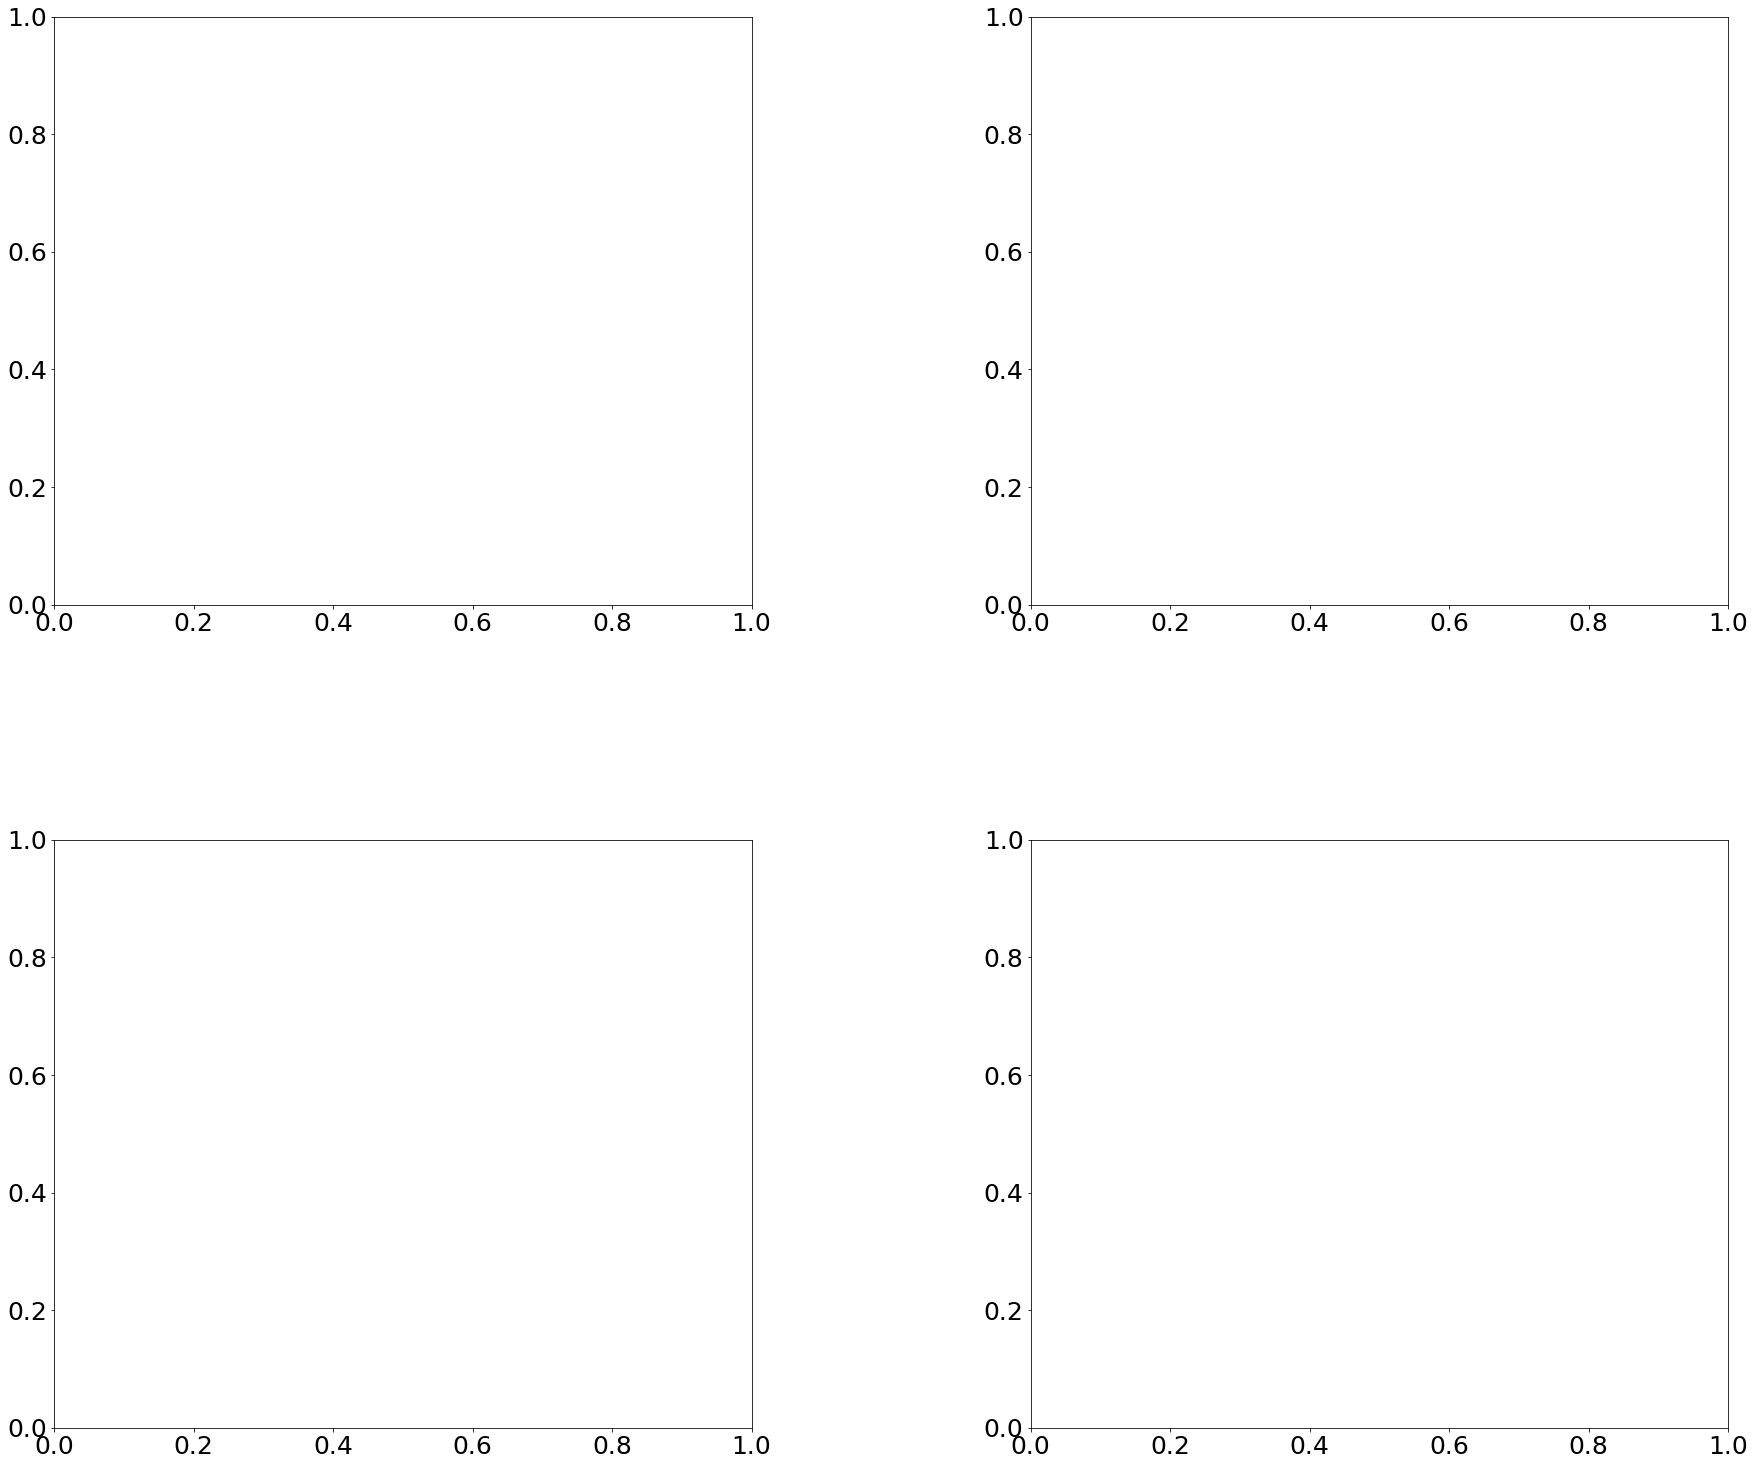

In [ ]:
#  NUmber of Assignments is less then Quizzes
@interact(st = stID, cs = course)
def plot_data( st, cs):
  # print(predict_std.reset_index().query(f"Course_code=='{cs}' & student_ID=='{st}'"))
  plot_std_Data(st, cs)

# below not working

In [ ]:
X_test.sample()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>
student_ID,,,,,,,,,,,,,,,,,,,,,,
130800162,g2_5,0,1.0,2.0,1,5.45,5.45,0.0,285,285.0,0.0,7.555304,1.6,2.5,70,9.89,5.134,0.08,895.0,493.585714,42.0,20


In [ ]:
df_avt.sample()

,student_ID,Course_code,Activity_id,Activity_type,Act_diff,Act_cp,Act_time,Act_mark
Act_submit_Time,,,,,,,,
2020-07-01 13:22:39,100538477,g5_4,g5_4-Act_14,0,1,2,605,0.35


In [ ]:
df_avt.keys()

Index(['student_ID', 'Course_code', 'Activity_id', 'Activity_type', 'Act_diff',
       'Act_cp', 'Act_time', 'Act_mark'],
      dtype='object')

In [ ]:
X_test.keys()

Index(['Course_code', 'Activity_type', 'Std_act_cp_mean', 'Std_act_d_mean',
       'Std_act_m_count', 'Std_act_m_max', 'Std_act_m_mean', 'Std_act_m_std',
       'Std_act_t_max', 'Std_act_t_mean', 'Std_act_t_std', 'Act_score',
       'Act_cp_mean', 'Act_diff_mean', 'Act_mark_count', 'Act_mark_max',
       'Act_mark_mean', 'Act_mark_min', 'Act_time_max', 'Act_time_mean',
       'Act_time_min', 'Activities_Count_<lambda>'],
      dtype='object')

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

,Actual Mark,Predicted Mark
student_ID,,
100813564,9.73,6.034192
110723380,8.21,8.199186
130698091,0.45,3.599329
060844639,3.03,2.991964
140261662,0.51,0.600607
110703780,1.45,1.279370


In [ ]:
X_test["predicted_Mark"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test=X_test.reindex()

In [ ]:
X_test.student_ID=="120405564"

student_ID
140286938    False
120605077    False
100115512    False
110745570    False
110810510    False
             ...  
070285557    False
060860198    False
081063216    False
070424979    False
120594765    False
Name: student_ID, Length: 1327, dtype: bool

In [ ]:
#X_test["student_ID"]=120405564
X_test.loc[X_test['student_ID'] =="120405564"]


,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,predicted_Mark,student_ID
student_ID,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
To show the predicted value on the graph


import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")

fig= px.line(df_plt.sort_values(by="Act_submit_Time"), 
             x="Act_submit_Time", y="Act_mark"  , title="Comparision between the student's mark (LINE) and the average of all students marks (BAR)", 
             labels ={"mark": "Act_mark" , "submit_Time" :"Act_submit_Time" } , 
             color_discrete_map={
                 "Act_mark": "blue"               
             })
fig1= px.bar(df_plt.sort_values(by="Act_submit_Time"),  labels= {"Act_submit_Time" :"Time" },
             x="Act_submit_Time", y="Act_mark_avg" , title="Comparision between the student's mark and the average of all students marks" ,      
              )
fig.add_trace(fig1.data[0])
#fig.update_layout(legend_title_text='Trend')



fig.update_traces(  hovertemplate=None)
fig.update_layout(hovermode="x" )


fig['data'][0]['showlegend']=True
fig['data'][0]['name']="Student's mark"

fig['data'][1]['showlegend']=True
fig['data'][1]['name']="Average Mark"

fig.show()




SyntaxError: ignored

## Pipeline    SGBClasssifier  Classification  Prediction 
![](https://i.ibb.co/xzWVv5H/pipe-Lasso.png)

In [ ]:
#df_stClass=pd.read_csv("./Data/MarkPrediction.csv", index_col=0)
df_stClass= df_mg

In [ ]:
df_stClass.head()

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark
student_ID,,,,,,,,,,,,,,,,,,,,,,,
060153728,g9_1,0,1.0,2.5,2,5.77,5.025000,1.053589,848,556.500000,412.243253,10.694730,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,5.77
060154824,g9_1,0,2.0,2.0,3,9.28,6.743333,2.289549,832,596.333333,243.331735,23.696990,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,9.28
060179000,g9_1,0,1.0,4.0,1,6.74,6.740000,0.000000,684,684.000000,0.000000,12.076459,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.74
060215341,g9_1,0,2.0,2.0,1,3.33,3.330000,0.000000,750,750.000000,0.000000,5.966559,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,3.33
060218548,g9_1,0,1.5,1.5,2,7.03,6.540000,0.692965,347,283.000000,90.509668,11.325721,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.05


In [ ]:
#df_mg.reset_index()
# df_mg.drop("student_ID", axis=1, inplace= True)  # Drop Student_ID
# df_stClass.set_index("student_ID", inplace=True)

- Ranking

$$\Large score=\log(\frac{\text{Qz_Max_time}}{\text{Qz_Avg_tim}}+\text{Qz_avg_diff*Qz_Avg_cp})*\frac{\text{Qz_Avg_mark}^2}{\text{Qz_Max_mark}}$$

In [ ]:
df_stClass.Act_score.describe().T

count    4404.000000
mean       14.220254
std         8.899514
min         0.010986
25%         7.269903
50%        13.226382
75%        19.869763
max        58.484161
Name: Act_score, dtype: float64

In [ ]:
df_stClass.Act_score.quantile(0.25)

7.269903087373425

In [ ]:
#  feature  Engineering

bins = [0, 
        df_stClass.Act_score.quantile(0.25),
        df_stClass.Act_score.quantile(0.5),
        df_stClass.Act_score.quantile(0.75), 
        df_stClass.Act_score.quantile(1)]
names = ['D', 'C', 'B', 'A']

df_stClass['Score_Class'] = pd.cut(df_stClass.Act_score,
                           bins, labels=names)

In [ ]:
df_stClass.head()

#  It's better to add data related to  timestamp feature:  dat, month, dayofteweek, monthOfTheyear .....

,Course_code,Activity_type,Std_act_cp_mean,Std_act_d_mean,Std_act_m_count,Std_act_m_max,Std_act_m_mean,Std_act_m_std,Std_act_t_max,Std_act_t_mean,Std_act_t_std,Act_score,Act_cp_count_mean,Act_diff_mean,Act_mark_count,Act_mark_max,Act_mark_mean,Act_mark_min,Act_time_max,Act_time_mean,Act_time_min,Activities_Count_<lambda>,last_mark,Score_Class
student_ID,,,,,,,,,,,,,,,,,,,,,,,,
060153728,g9_1,0,1.0,2.5,2,5.77,5.025000,1.053589,848,556.500000,412.243253,10.694730,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,5.77,C
060154824,g9_1,0,2.0,2.0,3,9.28,6.743333,2.289549,832,596.333333,243.331735,23.696990,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,9.28,A
060179000,g9_1,0,1.0,4.0,1,6.74,6.740000,0.000000,684,684.000000,0.000000,12.076459,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.74,C
060215341,g9_1,0,2.0,2.0,1,3.33,3.330000,0.000000,750,750.000000,0.000000,5.966559,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,3.33,D
060218548,g9_1,0,1.5,1.5,2,7.03,6.540000,0.692965,347,283.000000,90.509668,11.325721,1.379747,2.443038,79,9.53,4.752278,0.26,872.0,482.35443,64.0,20,6.05,C


In [ ]:
df_stClass.drop("Act_score", axis=1, inplace=True)

In [ ]:
# Split Data
X=df_stClass.iloc[:,:-1]
y=df_stClass["Score_Class"]

In [ ]:

from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(df[df.grade=="6"], test_size=0.3, random_state=42, shuffle=True)

X_train, X_test, y_train, y_test=train_test_split(X, y  , test_size=.3,   random_state=42)

In [ ]:
X_train.shape, X_test.shape

((3084, 22), (1323, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
     StandardScaler( )    # Rescaling
)

cat_pipeline= make_pipeline(
      
     #OneHotEncoder(  sparse=False ,handle_unknown = 'ignore'),
     OneHotEncoder(drop="if_binary" , sparse=False ), 
 
)

In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number"))  # Categorical features Encoding
     )

In [ ]:
preprocess.fit_transform(X_train).shape

(3084, 75)

In [ ]:
#df.select_dtypes(exclude="number").shape

In [ ]:
preprocess.fit_transform(X_train)[0]

array([ 1.22787112,  0.57126745,  0.10356464,  1.24213789,  0.95576371,
        1.13654462,  1.10289996, -0.13635115,  3.02137244, -1.04659736,
       -0.72575936,  0.7119329 ,  0.85747318,  0.62589648, -0.99288036,
       -1.52586336, -0.25551653,  0.3419869 , -0.67262698, -0.00960464,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
# pipelline Model
from xgboost import XGBClassifier
pipe_reg= make_pipeline(
    preprocess, 
    XGBClassifier()
    )

In [ ]:
pipe_reg.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f576f5f9150>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f576f5f9b10>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransformer__pipeline-1__memory': None,
 'columntransformer__pipeline-1__standardscaler': StandardScaler(),
 'columntransformer__pip

In [ ]:
# hyper parameters

param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    # 'pca__n_components':[40, 60, 80]

}

In [ ]:
# AUC and accuracy as score
from sklearn.metrics import accuracy_score, make_scorer, f1_score
scoring = make_scorer(f1_score(average='micro'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-151-50ccf65f4534>", line 3, in <module>
    scoring = make_scorer(f1_score(average='micro'))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
TypeError: f1_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/I

TypeError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf= KFold( n_splits=5, shuffle=True )
gs= RandomizedSearchCV( pipe_reg, param_distributions=param_grid,  scoring="scoring",  cv=kf,verbose=3)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
X_test.sample()

In [ ]:
std_Pred=X_test.loc["120512419"]

In [ ]:
gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred["Predicted_mark"]=gs.predict(X_test.loc["120512419"])

In [ ]:
std_Pred

In [ ]:
y_pred=gs.predict(X_test)

In [ ]:
from sklearn import  metrics
print(f"  MAE : { metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"  MSE : { metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"  RMSE : { np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R^2 : { metrics.r2_score(y_test, y_pred):.3f}")
print(f"  Explained Variance Score : { metrics.mean_absolute_error(y_test, y_pred):.3f}")

In [ ]:
# Residual Plot
import seaborn as sns
_= sns.residplot(x=y_test, y=y_pred, color="green")

In [ ]:
X_test.shape

In [ ]:
X_test.sample()

In [ ]:
df_avt.sample()

In [ ]:
df_avt.keys()

In [ ]:
X_test.keys()

In [ ]:
#  Last Mark Comparaison
pd.DataFrame({"Actual Mark": y_test, "Predicted Mark": y_pred}).sample(6)

In [ ]:
X_test["predicted_Mark"]=y_pred

In [ ]:
X_test.head()

# Rercommendation (INFO. taken from df_avt)

In [ ]:
df_avt.head()

,student_ID,Course_code,Activity_id,Activity_type,Unit_id,Chapter_id,Lesson_id,Act_diff,Act_cp_count,Act_time,Act_mark
Act_submit_Time,,,,,,,,,,,
2020-01-13 17:46:10,091015200,g6_4,g6_4-Act_12,1,Un_9,Chp_0,Ls_6,1,1,346,6.79
2020-10-24 02:17:07,091015200,g6_4,g6_4-Act_5,1,Un_1,Chp_6,Ls_4,2,2,415,9.35
2020-12-16 21:44:02,091015200,g6_4,g6_4-Act_19,1,Un_9,Chp_4,Ls_1,2,2,210,7.91
2020-01-23 23:47:40,091015200,g6_5,g6_5-Act_12,0,Un_8,Chp_4,Ls_6,4,2,716,1.26
2020-12-08 23:04:43,091015200,g6_2,g6_2-Act_5,1,Un_6,Chp_8,Ls_6,1,2,254,3.39


In [ ]:
df_avt = df_avt.reset_index()

In [ ]:
df_avt = df_avt.drop(['Act_submit_Time'], axis = 1)

## Version 1

In [ ]:
questions = pd.DataFrame()

In [ ]:
questions["Activity_id"] = df_avt["Activity_id"]
questions["Activity_type"] = df_avt["Activity_type"]

In [ ]:
questions.head()

,Activity_id,Activity_type
0,g6_4-Act_12,1
1,g6_4-Act_5,1
2,g6_4-Act_19,1
3,g6_5-Act_12,0
4,g6_2-Act_5,1


In [ ]:
#questions = questions.reset_index()

In [ ]:
#questions = questions.drop(['Act_submit_Time'], axis = 1)

In [ ]:
#questions.head()

In [ ]:
#### 1 Activity id shold hold ( from 5 to 10 questions)

questions['quest_id'] = np.random.randint(1, 1001, questions.shape[0])
#questions['quest_id'] =random.choice( ["q_"+str(j) for j in range(1,1001)] , questions.shape[0] )

In [ ]:
questions.head()

,Activity_id,Activity_type,quest_id
0,g6_4-Act_12,1,295
1,g6_4-Act_5,1,841
2,g6_4-Act_19,1,527
3,g6_5-Act_12,0,593
4,g6_2-Act_5,1,641


In [ ]:
questions.shape

(8279, 3)

In [ ]:
cp_for_quest = pd.DataFrame()

In [ ]:
cp_for_quest["quest_id"] = questions["quest_id"]

In [ ]:
cp_for_quest.head()

,quest_id
0,847
1,729
2,168
3,519
4,175


In [ ]:
####### 1 question id should hold between ( 1 to 3 sub cps)

cp_for_quest['sub_cp_id'] = np.random.randint(1, 4501, cp_for_quest.shape[0])  ##### estimated 4500 sub cp in all subjects

In [ ]:
cp_for_quest.head()

,quest_id,sub_cp_id
0,847,598
1,729,4458
2,168,1118
3,519,1941
4,175,1068


In [ ]:
####  1 cp should hold 1 to 3 sub_cps  ( each sub_cp   should match 1 learning object // doc - video .....)

sub_cp = pd.DataFrame()

In [ ]:
sub_cp['cp_id'] = np.random.randint(1, 1501, cp_for_quest.shape[0])   ##### estimated 1500 cp in all subjects

In [ ]:
sub_cp['sub_cp_id'] = cp_for_quest['sub_cp_id'] 

In [ ]:
sub_cp['lo_id'] = np.random.randint(1, 5001, cp_for_quest.shape[0])  ##### estimated 5000 learning object in all subjects

In [ ]:
sub_cp.head()

,cp_id,sub_cp_id,lo_id
0,1185,598,4628
1,99,4458,1500
2,540,1118,4056
3,258,1941,3385
4,597,1068,471


## Version 2

In [ ]:
#### 1 Activity id shold hold ( from 5 to 10 questions)

In [ ]:
lst = []
for i in range(1501):
     lst.append(random.choice([ "q_"+str(k) for k in range(1501)]))
df_lst=pd.DataFrame(lst)

In [ ]:
df_lst.duplicated().sum()

542

In [ ]:
def checkIfDuplicates_1(list1):
    ''' Check if given list contains any duplicates '''
    if len(list1) == len(set(list1)):
        return False
    else:
        return True

In [ ]:
list1 = lst
result = checkIfDuplicates_1(list1)
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')   

Yes, list contains duplicates


## TRY TO REMOVE DUPLICATES IN THE LIST

In [ ]:
final_list = list(set(lst))


#final_list = list(dict.fromkeys(lst))

#print(final_list)

In [ ]:
import itertools
lst.sort()
list(lst for lst,_ in itertools.groupby(lst))

## SHOULD INJECT THE UNIQUE LIST(LST) VALUES IN HERE AS (QUEST_ID)

In [ ]:
for i  in zip(df_avt.Activity_id):
  #for j in range (1, int((20*np.random.rand()+8))):
  for j in range(1 , 11):
    q= {
      #"quest_id": random.sample(lst, 1 )
      #"quest_id":  random.choice([ "q_"+str(k) for k in range(1501)])
    }
    list.append(q)
df_quest=pd.DataFrame(list)

In [ ]:
df_quest.shape

(83350, 1)

In [ ]:
df_quest["Activity_id"] = df_avt["Activity_id"]
df_quest["Activity_type"] = df_avt["Activity_type"]

In [ ]:
df_quest.head()

,quest_id,Activity_id,Activity_type
0,q_626,g9_2-Act_4,1
1,q_437,g9_2-Act_4,1
2,q_1325,g9_6-Act_20,1
3,q_333,g9_5-Act_3,0
4,q_830,g9_1-Act_18,0


In [ ]:
c = df_quest[df_quest.Activity_id=='g9_5-Act_3'][df_quest.Activity_type=='1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
c

,quest_id,Activity_id,Activity_type
438,q_1444,g9_5-Act_3,1
829,q_1398,g9_5-Act_3,1
2937,q_950,g9_5-Act_3,1
5442,q_321,g9_5-Act_3,1


In [ ]:
df_quest.duplicated(subset=['quest_id', 'Activity_id' , 'Activity_type'])

0        False
1        False
2        False
3        False
4        False
         ...  
83345     True
83346     True
83347     True
83348     True
83349     True
Length: 83350, dtype: bool

In [ ]:
df_quest.loc[df_quest.duplicated(), :]

,quest_id,Activity_id,Activity_type
591,q_554,g9_2-Act_18,1
1590,q_450,g4_4-Act_17,1
3383,q_18,g5_3-Act_6,0
5846,q_1405,g3_1-Act_3,0
6289,q_763,g2_6-Act_17,1
...,...,...,...
83345,q_612,NaN,NaN
83346,q_65,NaN,NaN
83347,q_1489,NaN,NaN
83348,q_384,NaN,NaN


In [ ]:
df_quest = df_quest.drop_duplicates()

In [ ]:
df_quest.head()

,quest_id,Activity_id,Activity_type
0,q_626,g9_2-Act_4,1
1,q_437,g9_2-Act_4,1
2,q_1325,g9_6-Act_20,1
3,q_333,g9_5-Act_3,0
4,q_830,g9_1-Act_18,0


In [ ]:
c = df_quest[df_quest.quest_id=='q_626']

In [ ]:
c

,quest_id,Activity_id,Activity_type
0,q_626,g9_2-Act_4,1
1589,q_626,g4_4-Act_7,0
1944,q_626,g3_6-Act_18,1
3078,q_626,g5_3-Act_18,1
3299,q_626,g4_1-Act_12,0
4835,q_626,g2_6-Act_10,0
5001,q_626,g5_6-Act_14,1
6304,q_626,g1_6-Act_16,0
7109,q_626,g8_4-Act_15,1
8335,q_626,NaN,NaN


 Create sub cp for each quest. ( TRAIL 1)

In [ ]:
####### 1 question id should hold between ( 1 to 3 sub cps)

quest_cp = pd.DataFrame()

In [ ]:
#quest_cp["quest_id"] = df_quest["quest_id"]

In [ ]:
#quest_cp.shape

In [ ]:
#### trail 1
quest_cp['sub_cp_id'] = np.random.randint(1, 4501, quest_cp.shape[0])  ##### estimated 4500 sub cp in all subjects

In [ ]:
#### trail 2

list=[]
for i  in zip(df_quest.quest_id):
  #for j in range (1, int((20*np.random.rand()+8))):
  for j in range(1 , 4):
    competency= {

      "sub_cp_id":  random.choice([ "s_"+str(k) for k in range(4501)]),
    }
    list.append(competency)
quest_cp=pd.DataFrame(list)

In [ ]:
quest_cp.head()

,sub_cp_id
0,s_19
1,s_2937
2,s_2242
3,s_480
4,s_563


In [ ]:
quest_cp["quest_id"] = df_quest["quest_id"]

In [ ]:
quest_cp.head()

,sub_cp_id,quest_id
0,s_19,q_626
1,s_2937,q_437
2,s_2242,q_1325
3,s_480,q_333
4,s_563,q_830


In [ ]:
d = quest_cp[quest_cp.quest_id=='q_626']

In [ ]:
d

,sub_cp_id,quest_id
0,s_19,q_626
1589,s_4134,q_626
1944,s_204,q_626
3078,s_576,q_626
3299,s_4024,q_626
4835,s_1597,q_626
5001,s_3085,q_626
6304,s_3918,q_626
7109,s_4172,q_626
8335,s_868,q_626


Create sub cp for each quest. ( TRAIL 2)

In [ ]:
list=[]
for i  in zip(df_quest.quest_id):
  for j in range (1, int((20*np.random.rand()+8))):
    activities= {

      "sub_cp_id":  random.choice([ "s_"+str(k) for k in range(4501)]),
    }
    list.append(activities)
df_quest_cp=pd.DataFrame(list)

In [ ]:
df_quest_cp["quest_id"] = df_quest["quest_id"]

In [ ]:
df_quest_cp.head()

,sub_cp_id,quest_id
0,s_435,q_1087
1,s_3706,q_28
2,s_3461,q_479
3,s_3816,q_1308
4,s_340,q_258


In [ ]:
####  1 cp should hold 1 to 3 sub_cps  ( each sub_cp   should match 1 learning object // doc - video .....)

In [ ]:
df_sub_cp = pd.DataFrame()

In [ ]:
list=[]
for i  in zip(df_quest_cp.sub_cp_id):
  for j in range (1, int((20*np.random.rand()+8))):
    activities= {
              "cp_id":  random.choice([ "cp_"+str(k) for k in range(1501)]),
              "lo_id":  random.choice([ "lo_"+str(k) for k in range(5001)])

    }
    list.append(activities)
df_sub=pd.DataFrame(list)

KeyboardInterrupt: ignored

In [ ]:
df_sub['sub_cp_id'] = df_quest_cp['sub_cp_id'] 

In [ ]:
#df_sub_cp['cp_id'] = np.random.randint(1, 1501, df_sub_cp.shape[0])   ##### estimated 1500 cp in all subjects

In [ ]:
#df_sub_cp['lo_id'] = np.random.randint(1, 5001, df_sub_cp.shape[0])  ##### estimated 5000 learning object in all subjects

In [ ]:
df_sub.head()

,sub_cp_id,cp_id,lo_id
0,3056,174,1349
1,4021,1081,2196
2,2794,1497,14
3,2752,824,3978
4,2273,137,3648


# Extra trails

In [ ]:
#from random_timestamp import random_timestamp
list=[]
for i, k , m  in zip(df_avt.Course_code, df_avt.Activity_id , df_avt.Activity_type):
  for j in range (1, int((20*np.random.rand()+8))):
    course_id=random.choice(["g"+str(i)+"_"+str(l) for l in range(1,7)])
    ActType=random.choice(["1", "0" ])
    ques= {
        #"student_ID": i ,
        "Course_code":i,  
        "Activity_id": f"{i}_Act_{int(20*np.random.rand()+1)}",
        "Activity_type":ActType,
        "quest_id":  random.choice([ "quest_"+str(r) for r in range(1,11)])

    }
    list.append(ques)
df_quest=pd.DataFrame(list)

In [ ]:
df_quest.head(21)

,Course_code,Activity_id,Activity_type,quest_id
0,g6_1,g6_1_Act_19,1,quest_4
1,g6_1,g6_1_Act_15,0,quest_2
2,g6_1,g6_1_Act_14,1,quest_4
3,g6_1,g6_1_Act_11,1,quest_4
4,g6_1,g6_1_Act_16,0,quest_9
5,g6_1,g6_1_Act_11,0,quest_9
6,g6_1,g6_1_Act_2,1,quest_10
7,g6_1,g6_1_Act_8,0,quest_1
8,g6_1,g6_1_Act_20,1,quest_9
9,g6_1,g6_1_Act_3,1,quest_3


In [ ]:
a = df_quest[df_quest.Activity_id=='g6_3-Act_20']

In [ ]:
a

,Course_code,Activity_id,Activity_type,quest_id


In [ ]:
df_quest.duplicated(subset=['Course_code', 'Activity_id', 'Activity_type' , 'quest_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
135954     True
135955     True
135956     True
135957     True
135958     True
Length: 135959, dtype: bool

In [ ]:
df_quest.loc[df_quest.duplicated(), :]

,Course_code,Activity_id,Activity_type,quest_id
6,g4_1,g4_1_Act_19,0,quest_4
14,g4_1,g4_1_Act_9,0,quest_9
40,g4_1,g4_1_Act_4,0,quest_9
67,g4_6,g4_6_Act_1,0,quest_3
80,g4_6,g4_6_Act_19,0,quest_4
...,...,...,...,...
135954,g7_1,g7_1_Act_17,1,quest_8
135955,g7_1,g7_1_Act_15,1,quest_6
135956,g7_1,g7_1_Act_11,0,quest_1
135957,g7_1,g7_1_Act_20,0,quest_4


In [ ]:
df_quest = df_quest.drop_duplicates()

In [ ]:
a = df_quest[df_quest.Activity_id=='g4_6_Act_19'][df_quest.Activity_type == "1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
 a


,Course_code,Activity_id,Activity_type,quest_id
5064,g4_6,g4_6_Act_19,1,quest_4
13451,g4_6,g4_6_Act_19,1,quest_5
13565,g4_6,g4_6_Act_19,1,quest_9
14345,g4_6,g4_6_Act_19,1,quest_6
19598,g4_6,g4_6_Act_19,1,quest_2
24433,g4_6,g4_6_Act_19,1,quest_3
31398,g4_6,g4_6_Act_19,1,quest_10
54983,g4_6,g4_6_Act_19,1,quest_8
62226,g4_6,g4_6_Act_19,1,quest_1
99879,g4_6,g4_6_Act_19,1,quest_7


In [ ]:
a

,Course_code,Activity_id,Activity_type,quest_id
0,g4_1,g4_1_Act_20,1,quest_7
1,g4_1,g4_1_Act_1,1,quest_9
2,g4_1,g4_1_Act_17,0,quest_5
3,g4_1,g4_1_Act_12,1,quest_7
4,g4_1,g4_1_Act_5,0,quest_9
...,...,...,...,...
136093,g7_1,g7_1_Act_14,1,quest_1
136094,g7_1,g7_1_Act_2,1,quest_10
136095,g7_1,g7_1_Act_6,0,quest_5
136096,g7_1,g7_1_Act_19,0,quest_6


In [ ]:
df = pd.DataFrame([(i, j, k) 
                    for i in range(1, 11) 
                    for j in range(1, 6)
                    for k in range(1, 6)], 
                    columns=['quest_id', 'sub_cp_id', 'lo_id'])


In [ ]:
df[df.quest_id == 2]

,quest_id,sub_cp_id,lo_id
25,2,1,1
26,2,1,2
27,2,1,3
28,2,1,4
29,2,1,5
30,2,2,1
31,2,2,2
32,2,2,3
33,2,2,4
34,2,2,5
